- ver0.0 2025/10/27 雛形を作成 (小川)
- ver0.1 2025/11/01 章立てを作成 (小川)
- ver0.2 2025/11/11 「交差共鳴ゲート較正1：ZXハミルトニアンの生成」までを作成 (小川)
- ver0.3 2025/11/13 「交差共鳴ゲート較正2：ZX90パルスの較正」までを作成（小川）
- ver0.4 2025/11/14 「応用3：2qubit VQEの実装」までを作成（小川）

<span style="color: red; ">**examples/2Q-calibrationのフォルダをご自身のworkspaceに移動させてから, 実験を行ってください.**</span>

## クラウド設定

一度だけ実行すれば良い.

In [ ]:
# from pathlib import Path

# config = """[default]
# url=https://api.qiqb-cloud.jp
# api_token=xxxxxxx
# """
# Path("~/.oqtopus").expanduser().write_text(config)
# print("Configuration saved.")

Configuration saved.


QIQBクラウドのリンク：https://www.qiqb-cloud.jp/  
  
「ジョブ」のタブで, 実行済み・実行中のジョブを確認することができます. 

## 2qubitの較正 

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from oqtopus_sse_pulse.adapter import QuriAdapter, collect_payloads_from_job, collect_session_from_job
from oqtopus_sse_pulse.plotters import plot_payload

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

DEVICE = "anemone" # デバイス名 (勉強会ではanemoneに固定)
backend = OqtopusSseBackend() # OqtopusSseBackendのインスタンスを作成

In [2]:
def experiment(program: str) -> list:
    """
    指定した実験プログラムを実行し, 測定結果のペイロードを返す関数.
    """

    # ジョブの実行
    job = backend.run_sse(
        file_path=f"{program}.py",
        device_id=f"{DEVICE}-pulse",
        name=program,
    )
    print(f"job_id = {job.job_id}")

    # ジョブの完了待ち
    job.wait_for_completion()
    print(f"job_status = {job.status}  elapsed={job.execution_time}")

    # QuriAdapterの作成
    adapter = QuriAdapter(backend)

    # 測定結果の取得
    payloads = collect_payloads_from_job(
        backend=adapter,
        job_id=job.job_id,
    )
    
    return payloads

### 使用する2qubitそれぞれの較正

事前に`1Q-calib.ipynb`を実行して, 使用する2つのqubitのhpiパルスの較正と読み出し分類器の調整を行っておいてください.

### 交差共鳴ゲート較正1：ZXハミルトニアンの生成 

まずはcontrol = 0, 1の時にCRパルスだけをパルス時間を掃引しながら照射し, control, tragetをそれぞれX,Y,Z期待値測定して, それぞれのqubitの動きを観察します.  

In [7]:
# 実験コード
payloads_0XX = experiment("2Q-calib-1_CRcalib_0XX")
payloads_0YY = experiment("2Q-calib-1_CRcalib_0YY")
payloads_0ZZ = experiment("2Q-calib-1_CRcalib_0ZZ")
payloads_1XX = experiment("2Q-calib-1_CRcalib_1XX")
payloads_1YY = experiment("2Q-calib-1_CRcalib_1YY")
payloads_1ZZ = experiment("2Q-calib-1_CRcalib_1ZZ")


job_id = 06912ef8-d98d-75c6-8000-845c701355a7
job_status = succeeded  elapsed=20.508
job_id = 06912efa-84ff-7efb-8000-30babd95ac4e
job_status = succeeded  elapsed=21.313
job_id = 06912efc-3a0f-7029-8000-bf02d9bb8828
job_status = succeeded  elapsed=20.297
job_id = 06912efd-e5bb-729b-8000-7fe4098b9f07
job_status = succeeded  elapsed=20.555
job_id = 06912eff-96f6-7831-8000-07a739ed44ac
job_status = succeeded  elapsed=20.458
job_id = 06912f01-4db5-74d8-8000-1209566e93a7
job_status = succeeded  elapsed=20.532


In [ ]:
# 測定で得られた全データ
duration_list = payloads_0XX[0]["duration_list"]

ctrl_0X_real = payloads_0XX[0]["ctrl_data_real"]
ctrl_0X_imag = payloads_0XX[0]["ctrl_data_imag"]
trgt_0X_real = payloads_0XX[0]["trgt_data_real"]
trgt_0X_imag = payloads_0XX[0]["trgt_data_imag"]

ctrl_0Y_real = payloads_0YY[0]["ctrl_data_real"]
ctrl_0Y_imag = payloads_0YY[0]["ctrl_data_imag"]
trgt_0Y_real = payloads_0YY[0]["trgt_data_real"]
trgt_0Y_imag = payloads_0YY[0]["trgt_data_imag"]

ctrl_0Z_real = payloads_0ZZ[0]["ctrl_data_real"]
ctrl_0Z_imag = payloads_0ZZ[0]["ctrl_data_imag"]
trgt_0Z_real = payloads_0ZZ[0]["trgt_data_real"]
trgt_0Z_imag = payloads_0ZZ[0]["trgt_data_imag"]

ctrl_1X_real = payloads_1XX[0]["ctrl_data_real"]
ctrl_1X_imag = payloads_1XX[0]["ctrl_data_imag"]
trgt_1X_real = payloads_1XX[0]["trgt_data_real"]
trgt_1X_imag = payloads_1XX[0]["trgt_data_imag"]

ctrl_1Y_real = payloads_1YY[0]["ctrl_data_real"]
ctrl_1Y_imag = payloads_1YY[0]["ctrl_data_imag"]
trgt_1Y_real = payloads_1YY[0]["trgt_data_real"]
trgt_1Y_imag = payloads_1YY[0]["trgt_data_imag"]

ctrl_1Z_real = payloads_1ZZ[0]["ctrl_data_real"]
ctrl_1Z_imag = payloads_1ZZ[0]["ctrl_data_imag"]
trgt_1Z_real = payloads_1ZZ[0]["trgt_data_real"]
trgt_1Z_imag = payloads_1ZZ[0]["trgt_data_imag"]

# 測定データ(data_real, data_imag)をZ期待値リストに変換
ctrl_0X = [z_expectation_value_ctrl(r, i) for r, i in zip(ctrl_0X_real, ctrl_0X_imag)]
ctrl_0Y = [z_expectation_value_ctrl(r, i) for r, i in zip(ctrl_0Y_real, ctrl_0Y_imag)]
ctrl_0Z = [z_expectation_value_ctrl(r, i) for r, i in zip(ctrl_0Z_real, ctrl_0Z_imag)]
trgt_0X = [z_expectation_value_trgt(r, i) for r, i in zip(trgt_0X_real, trgt_0X_imag)]
trgt_0Y = [z_expectation_value_trgt(r, i) for r, i in zip(trgt_0Y_real, trgt_0Y_imag)]
trgt_0Z = [z_expectation_value_trgt(r, i) for r, i in zip(trgt_0Z_real, trgt_0Z_imag)]

ctrl_1X = [z_expectation_value_ctrl(r, i) for r, i in zip(ctrl_1X_real, ctrl_1X_imag)]
ctrl_1Y = [z_expectation_value_ctrl(r, i) for r, i in zip(ctrl_1Y_real, ctrl_1Y_imag)]
ctrl_1Z = [z_expectation_value_ctrl(r, i) for r, i in zip(ctrl_1Z_real, ctrl_1Z_imag)]
trgt_1X = [z_expectation_value_trgt(r, i) for r, i in zip(trgt_1X_real, trgt_1X_imag)]
trgt_1Y = [z_expectation_value_trgt(r, i) for r, i in zip(trgt_1Y_real, trgt_1Y_imag)]
trgt_1Z = [z_expectation_value_trgt(r, i) for r, i in zip(trgt_1Z_real, trgt_1Z_imag)]

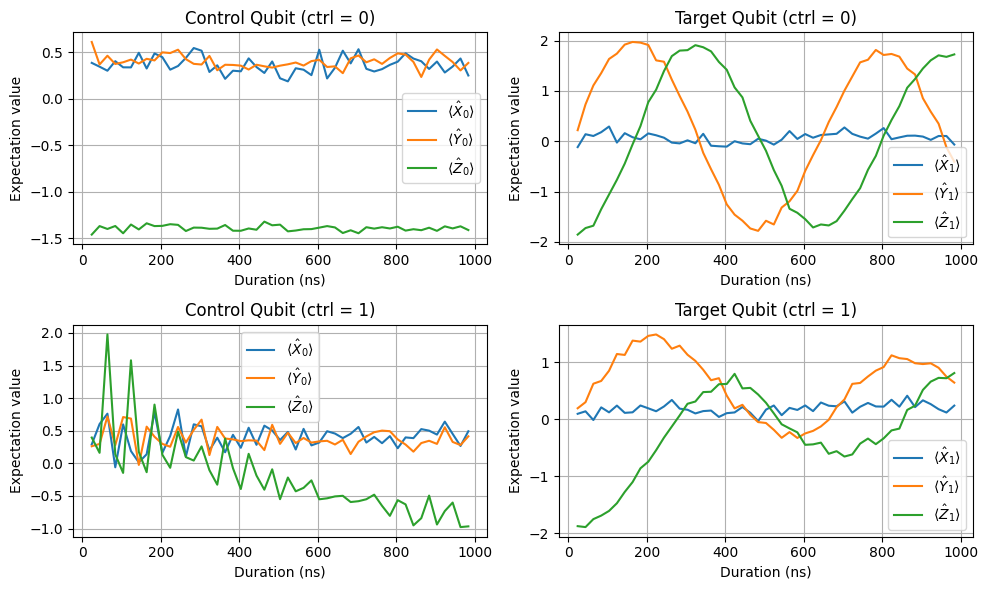

In [ ]:
# グラフ描画

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.title("Control Qubit (ctrl = 0)")
plt.plot(duration_list, ctrl_0X, label=r"$\langle \hat{X}_0 \rangle$")
plt.plot(duration_list, ctrl_0Y, label=r"$\langle \hat{Y}_0 \rangle$")
plt.plot(duration_list, ctrl_0Z, label=r"$\langle \hat{Z}_0 \rangle$")
plt.xlabel("Duration (ns)")
plt.ylabel('Expectation value')
plt.legend()    
plt.grid()

plt.subplot(2, 2, 2)
plt.title("Target Qubit (ctrl = 0)")
plt.plot(duration_list, trgt_0X, label=r"$\langle \hat{X}_1 \rangle$")
plt.plot(duration_list, trgt_0Y, label=r"$\langle \hat{Y}_1 \rangle$")
plt.plot(duration_list, trgt_0Z, label=r"$\langle \hat{Z}_1 \rangle$")
plt.xlabel("Duration (ns)")
plt.ylabel("Expectation value")
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.title("Control Qubit (ctrl = 1)")
plt.plot(duration_list, ctrl_1X, label=r"$\langle \hat{X}_0 \rangle$")
plt.plot(duration_list, ctrl_1Y, label=r"$\langle \hat{Y}_0 \rangle$")
plt.plot(duration_list, ctrl_1Z, label=r"$\langle \hat{Z}_0 \rangle$")
plt.xlabel("Duration (ns)")
plt.ylabel("Expectation value")
plt.legend()  
plt.grid()  

plt.subplot(2, 2, 4)
plt.title("Target Qubit (ctrl = 1)")
plt.plot(duration_list, trgt_1X, label=r"$\langle \hat{X}_1 \rangle$")
plt.plot(duration_list, trgt_1Y, label=r"$\langle \hat{Y}_1 \rangle$")
plt.plot(duration_list, trgt_1Z, label=r"$\langle \hat{Z}_1 \rangle$")
plt.xlabel("Duration (ns)")
plt.ylabel("Expectation value")
plt.legend()
plt.tight_layout()
plt.grid()

plt.show()

control qubitは, CRパルス長が0の極限では$\langle \hat{X} \rangle = \langle \hat{Y} \rangle = 0$, $\langle \hat{Z} \rangle = 0$ or $1$であり, パルス長が長くなるとエネルギー緩和により$\langle \hat{Z} \rangle = 1$が少しずつ$0$に緩和する様子が見えます（それ以外の振る舞いがある場合には, 別のqubitやTLSとの周波数衝突などが考えられます）.   
一方target qubitは, control qubitの状態が0か1によって異なる振動数で, $\langle \hat{X} \rangle$, $\langle \hat{Y} \rangle$, $\langle \hat{Y} \rangle$いずれも正弦振動する様子が見られます.  
  
これらは, control qubitのZ状態に依存してtarget qubitをラビ振動させる$\hat{Z}\otimes(\cos(\phi_{\rm CR})\hat{X}+\sin(\phi_{\rm CR})\hat{Y})$の項 ($\phi_{\rm CR}$はtarget qubitが感じるCRパルスの位相) と, $\hat{I}\otimes(\cos(\phi_{\rm XT})\hat{X}+\sin(\phi_{\rm XT})\hat{Y})$の項 ($\phi_{\rm XT}$はtarget qubitが感じるCRパルスのクロストーク成分の位相) に起因する振る舞いであり, control qubitが0, 1の時, target qubitにはそれぞれ$[\pm\cos(\phi_{\rm CR})+\cos(\phi_{\rm XT})]\hat{X}+[\pm\sin(\phi_{\rm CR})+\sin(\phi_{\rm CR})]\hat{Y}$の回転が生じます.  
  
これらの各係数は, 正弦関数でフィッティングし, 以下で説明するハミルトニアントモグラフィを行うことによって求めることができ, それらの値をCRパルスの回転角とキャンセルパルスの振幅と位相にフィードバックすることによって, CNOTゲートに必要な$\hat{Z}\otimes\hat{X}$成分だけを残すことができます.     

**CRのハミルトニアントモグラフィ**  
  
CRゲートのハミルトニアンは, 一般に以下の形で表されると仮定できます:
$$
\begin{align}
\hat{H}_{\rm CR}/\hbar &= \varOmega_{II} \hat{II} + \varOmega_{IX} \hat{IX} + \varOmega_{IY} \hat{IY} + \varOmega_{IZ} \hat{IZ} + \varOmega_{ZI} \hat{ZI} + \varOmega_{ZX} \hat{ZX} + \varOmega_{ZY} \hat{ZY} + \varOmega_{ZZ} \hat{ZZ} \\
&= \hat{IA} + \hat{ZB} \\
&= |{\rm g}\rangle\langle{\rm g}|\otimes(\hat{A} + \hat{B}) + |{\rm e}\rangle\langle{\rm e}|\otimes(\hat{A} - \hat{B}) \\
\hat{A} &= \varOmega_{II} \hat{I} + \varOmega_{IX} \hat{X} + \varOmega_{IY} \hat{Y} + \varOmega_{IZ} \hat{Z} \\
\hat{B} &= \varOmega_{ZI} \hat{I} + \varOmega_{ZX} \hat{X} + \varOmega_{ZY} \hat{Y} + \varOmega_{ZZ} \hat{Z}
\end{align}
$$
ctrl_qubitを|g>, |e>とした場合, trgt_qubitはそれぞれ$\hat{A}\pm\hat{B}$のハミルトニアンで時間発展します. 
1qubitのハミルトニアントモグラフィによって$\hat{A}\pm\hat{B}$における$\hat{X},\hat{Y},\hat{Z}$の係数$\varOmega_i^{\rm g}, \varOmega_i^{\rm e}$ $(i=x,y,z)$は後述の方法で求めることができ, これらを用いて
$$
\begin{align}
\varOmega_{Ii} = \frac{\varOmega_i^{\rm g} + \varOmega_i^{\rm e}}{2},\quad
\varOmega_{Zi} = \frac{\varOmega_i^{\rm g} - \varOmega_i^{\rm e}}{2},\quad(i=x,y,z)
\end{align}
$$
として, 元のハミルトニアンの各パウリ演算子の係数を求めることができます. 

1qubitのハミルトニアントモグラフィは以下の手順で行います.  
1qubitユニタリ時間発展の演算子を以下のように表します:
$$
\begin{align}
\exp\big[-\mathrm{i}\big(\varOmega_x \hat{X} + \varOmega_y \hat{Y} + \varOmega_z \hat{Z}\big)t\big]
& =\exp\big[-\mathrm{i}\varOmega t\big(n_x \hat{X} + n_y \hat{Y} + n_z \hat{Z}\big)\big]\\
\varOmega & = \sqrt{\varOmega_x^2 + \varOmega_y^2 + \varOmega_z^2} \\
n_i &= \frac{\varOmega_i}{\varOmega} \quad(i = x,y,z)
\end{align}
$$
初期状態|g>をこのユニタリ演算子で時間発展させ, 各パウリ演算子の期待値測定を行うと, 以下の測定結果が得られます: 
$$
\begin{align}
\langle\hat{Z}\rangle &= \cos^2(- \varOmega t) + \sin^2(- \varOmega t)(-n_x^2 -n_y^2 +n_z^2) \\
\langle\hat{X}\rangle &= 2\sin(- \varOmega t)[-\cos(- \varOmega t)n_y + \sin(- \varOmega t)n_x n_z] \\
\langle\hat{Y}\rangle &= 2\sin(- \varOmega t)[\cos(- \varOmega t)n_x + \sin(- \varOmega t)n_y n_z]
\end{align}
$$
$\varOmega$, $n_x$, $n_y$, $n_z$をフィッティングパラメータとして測定結果にフィッティングし, これら4パラメータを求め, そこから$\varOmega_i = \varOmega n_i$ ($i=x,y,z$)の値が得られます.   

<span style="color: red; ">**[自主作業1] 上のtarget qubitの測定結果を正弦関数でフィッティングし, ハミルトニアントモグラフィを行うことで, $\hat{IX}$, $\hat{IY}$, $\hat{IZ}$, $\hat{ZX}$, $\hat{ZY}$, $\hat{ZZ}$の係数を求めてください.**</span> 

次に, CRパルスの位相を粗調整し, ZX成分を正に, ZY成分を小さくします. 

<span style="color: red; ">**[自主作業2] 上のハミルトニアントモグラフィの結果から$\phi_{\rm CR}$を求め, CRパルスの位相を$-\phi_{\rm CR}$に書き換えてもう一度CRパルスの掃引実験を行い, さらにその測定データに対してハミルトニアントモグラフィを行い, $\hat{ZX}$成分が大きくなり, $\hat{ZY}$成分が抑制されていることを確認してください.**</span> 

次に, キャンセレーションパルスを粗調整し, IX, IY成分を十分小さくします. 

<span style="color: red; ">**[自主作業3] 上のハミルトニアントモグラフィの結果から$A_{\rm XT}$ (クロストーク成分の振幅), $\phi_{\rm XT}$を求め, $A_{\rm XT}\cos(-\phi_{\rm XT})$のキャンセレーションパルスをtarget qubitに追加してもう一度CRパルスの掃引実験を行い, さらにその測定データに対してハミルトニアントモグラフィを行い, $\hat{IX}$, $\hat{IY}$成分が抑制されていることを確認してください.**</span> 
-  この時$\hat{ZX}$, $\hat{ZY}$成分が増えることがありますが, 以降の測定でさらに抑制するので問題ありません. 

<span style="color: red; ">**[自主作業4] 自主作業2,3の測定を数回繰り返すことで, $\hat{ZY}$, $\hat{IX}$, $\hat{IY}$成分を抑制し, $\hat{ZX}$成分を残すように, CRパルス位相とtarget qubitへのキャンセレーションパルスを較正してください.**</span>
- $\hat{IZ}$項が多少残ることがありますが, これはCRパルスの周波数とtarget qubitの共鳴周波数のずれにより生じるものです. 気になる場合は, $\hat{IZ}$項の係数分だけCRパルス周波数をずらして調整してみてください. 
-  $\hat{ZZ}$項が多少残ることがありますが, 2つのトランズモンの結合系に必然的に現れる常在ZZ相互作用というものです. この項はここでは完全に消すことはできないのですが, 以下でエコーシーケンスを使用することで抑制することができます.  

ここまでの作業で, 一連のCRシーケンスによって誘起されるハミルトニアンは, ハミルトニアントモグラフィで測定されるものは$\hat{ZX}$と$\hat{ZZ}$だけになりました.  
実際は, control qubitはCRパルスが非共鳴に照射されているため, ac-Starkシフトによって$\hat{ZI}$というcontrol qubitのZ回転が生じています.  
この時, エコーCRシーケンスを構成することで$\hat{ZX}$以外の余計な項を抑制することができます.     

**エコーCRシーケンス**  
  
上で較正したパルスシーケンスによって, 
$$
\begin{align}
\hat{H}_{\rm CR} = \varOmega_{ZI}\hat{ZI} + \varOmega_{ZX}\hat{ZX} + \varOmega_{ZZ}\hat{ZZ}
\end{align}
$$
のハミルトニアンが実現できています.  
時間$T$だけ時間発展させると, 2qubitに対して 
$\hat{U}_{\rm CR}(T) = \exp(- {\rm i} \hat{H}_{\rm CR}T)$ 
というユニタリ演算子が作用することになります.  
  
エコーCRシーケンスでは, この直後にまずcontrol qubitだけにhpiパルス×2を適用して $\hat{X}$ 反転を行います.  
続いて, 上のCRシーケンスにおけるCRパルスとキャンセレーションパルスの位相を$\pi$反転したパルスシーケンスを適用します.  
このシーケンスでは元のシーケンスと比べてX回転方向が反対になっていることから, 実現されるハミルトニアンは,
$$
\begin{align}
\hat{H}_{\rm -CR} = \varOmega_{ZI}\hat{ZI} - \varOmega_{ZX}\hat{ZX} + \varOmega_{ZZ}\hat{ZZ}
\end{align}
$$ 
という形で表されます ($\hat{X}$のみが符号反転します).  
前半と同じく時間$T$だけ時間発展させると, 2qubitに対して 
$\hat{U}_{\rm -CR}(T) = \exp(- {\rm i} \hat{H}_{\rm -CR}T)$ 
というユニタリ演算子が作用することになります.  
最後に, もう一度control qubitだけにhpiパルス×2を適用して $\hat{X}$ 反転を行います.  
  
後半のこれら一連のユニタリ発展は以下のように表すことができます:
$$
\begin{align}
\hat{XI} \cdot \hat{U}_{\rm -CR}(T) \cdot \hat{XI} 
&= 
\hat{XI}
\exp[ -{\rm i} (\varOmega_{ZI}\hat{ZI} - \varOmega_{ZX}\hat{ZX} + \varOmega_{ZZ}\hat{ZZ}) T]
\hat{XI} \\
&= 
\exp[ -{\rm i} (- \varOmega_{ZI}\hat{ZI} + \varOmega_{ZX}\hat{ZX} - \varOmega_{ZZ}\hat{ZZ}) T]
\end{align}
$$ 
ここで$\hat{X}\hat{Z}\hat{X}=-\hat{Z}$という関係を用いました.  
したがってエコーCRシーケンス全体でのユニタリ発展は, 
$$
\begin{align}
\hat{U}_{\rm echo-CR}(2T) &= 
\hat{XI} \cdot \hat{U}_{\rm -CR}(T) \cdot \hat{XI} \cdot \hat{U}_{\rm CR}(T) \\
&= 
\exp[ -{\rm i} (- \varOmega_{ZI}\hat{ZI} + \varOmega_{ZX}\hat{ZX} - \varOmega_{ZZ}\hat{ZZ}) T]
\cdot
\exp[ -{\rm i} (\varOmega_{ZI}\hat{ZI} - \varOmega_{ZX}\hat{ZX} + \varOmega_{ZZ}\hat{ZZ}) T]
\end{align}
$$
と表されます.  
  
仮に$\exp(\hat{A})\exp(\hat{B}) = \exp(\hat{A}+\hat{B})$が成り立てば, エコーCRシーケンスのユニタリ発展は$\hat{ZX}$の項だけが残ってくれます.  
しかしこの関係は$[\hat{A}, \hat{B}]=0$の場合しか成り立たず, 一般には以下のような近似を含む関係で表されます:
$$
\begin{align}
\exp(\lambda\hat{A})\exp(\lambda\hat{B}) = \exp\left( \lambda\hat{A}+\lambda\hat{B} + \frac{\lambda^2[\hat{A}, \hat{B}]}{2} + O(\lambda^3) \right)
\end{align}
$$ 
ここで$\lambda$は次数を明示するための係数で, $\lambda\rightarrow 1$と考えます.  
  
CRシーケンスにおいては$\hat{ZX}$は$\hat{ZZ}$とは非可換ですが, エコーを入れることによって$\hat{ZX}$以外の項は2次の係数に落とすことができ, 近似的に$\hat{ZX}$ハミルトニアンによる時間発展が実現できることになります. 

<span style="color: red; ">**[自主作業5] `echo = True`と選ぶことにより, ZXハミルトニアンのみが実効的に残ることを確認してください.**</span>

### 交差共鳴ゲート較正2：ZX90パルスの較正

次に, パルス長を調整してZX90ゲートを較正します.  
ZX90ゲートは
$$
\begin{align}
ZX90 &= \exp\left(-{\rm i} \frac{(\pi/2)\hat{ZX}}{2}\right)\\
&= |0\rangle \langle 0| \otimes \exp\left(-{\rm i} \frac{(\pi/2)\hat{X}}{2}\right)
+ |1\rangle \langle 1| \otimes \exp\left(-{\rm i} \frac{(-\pi/2)\hat{X}}{2}\right)\\
&= |0\rangle \langle 0| \otimes R_x(\pi/2)
+ |1\rangle \langle 1| \otimes R_x(-\pi/2)
\end{align}
$$
と表せます.  
つまり, control qubitが0, 1の時のtarget qubitの回転がどちらも90°となるようにCRパルス長を調整すれば, ZX90パルスが較正できます.  


<span style="color: red; ">**[自主作業6] CRパルス長を掃引しながらcontrol qubitが0,1の時のtarget qubitのZ期待値を測定し, ZX90を実現するプログラムを構成してください.**</span>

<span style="color: red; ">**[自主作業7] control qubitが0,1の時にZX90を繰り返し適用した後に, target qubitのX,Y,Z期待値を測定するプログラムを書き, 繰り返し回数に応じてtarget qubitがそれぞれ±X軸周りに90°ずつ回転することを確かめてください.**</span>

ZX90ゲートは, 以下のようにcontrol qubitとtarget qubitの役割を入れ替えて考えることができます.   
$$
\begin{align}
ZX90 
&= |0\rangle \langle 0| \otimes R_x(\pi/2)
+ |1\rangle \langle 1| \otimes R_x(-\pi/2) \\
&= R_z(\pi/2) \otimes |+\rangle \langle +| 
+ R_z(-\pi/2) \otimes |-\rangle \langle -| 
\end{align}
$$

<span style="color: red; ">**[自主作業8] 元々control qubitとしていたqubitを$|+\rangle$に準備し, 元々target qubitとしていたqubitが$|+\rangle$, $|-\rangle$の時にZX90を繰り返し適用した後に, 元々control qubitとしていたqubitのX,Y,Z期待値を測定するプログラムを書き, 繰り返し回数に応じて元々control qubitとしていたqubitがそれぞれ±Z軸周りに90°ずつ回転することを確かめてください.**</span>

ZX90の直前もしくは直後に, traget qubitに対して$R_z(-\pi/2)$回転, target qubitに対して$R_x(-\pi/2)$を作用させると（可換なので前後どちらでも良い）, 以下のようにCNOTが実現できます:
$$
\begin{align}
&ZX90 \cdot  R_z(-\pi/2) \otimes  R_x(-\pi/2) \\
&= |0\rangle \langle 0| \cdot R_z(-\pi/2) \otimes R_x(\pi/2) \cdot R_x(-\pi/2)
+ |1\rangle \langle 1| \cdot R_z(-\pi/2)\otimes R_x(-\pi/2) \cdot R_x(-\pi/2) \\
&= |0\rangle \langle 0| {\rm e}^{{\rm i}\pi/4} \otimes \hat{I}
+ |1\rangle \langle 1| {\rm e}^{-{\rm i}\pi/4} \otimes ({\rm i} \hat{X}) \\
&= {\rm e}^{{\rm i}\pi/4} \left( |0\rangle \langle 0| \otimes \hat{I}
+ |1\rangle \langle 1|  \otimes \hat{X}
\right)
\end{align}
$$

<span style="color: red; ">**[自主作業9] CNOTゲートを実現することを確かめる実験を行なってください.**</span>

### 2Q Randomized Benchmarking (TBD)

外部ファイル読み込みに関するシステム調整が必要なため, 準備は保留. 

### 応用1：ベル状態生成

ベル状態は以下の手順で生成することが可能です:
$$
\begin{align}
|0\rangle |0\rangle 
&\xrightarrow{H\otimes I} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) |0\rangle \\
&\xrightarrow{\rm CNOT} \frac{1}{\sqrt{2}}(|0\rangle |0\rangle + |1\rangle |1\rangle)
\end{align}
$$
アダマールゲート$H$の箇所は, 今回の場合は$|0\rangle$を$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$に変換できればいいだけなので, $R_y\!\left(\frac{\pi}{2}\right)$で代用可能です. 

ベル状態に対する測定では, 2つのqubitの測定結果に相関が現れます.  
ベル状態にある2つのqubitに対してZ測定を行うと, 00, 11が出る確率$P(00)$, $P(11)$が1/2, 01, 10が出る確率$P(01)$, $P(10)$は0となります.  

実験的には, measureメソッドにおいて`mode='single'`を指定し, kerneled dataを読み出し分類器にかけて0/1値にし, 無加工の$[P(00), P(01), P(10), P(11)]$の値を得ます.  
さらにこのベクトルに対して混同行列の逆行列の2qubit分のテンソル積をかけることで, 測定エラーミティゲーションが行われた$P(00)$, $P(01)$, $P(10)$, $P(11)$の値が得られます. 

<span style="color: red; ">**[自主作業10] ベル状態を生成し, Z測定の確率分布を出力してみてください.**</span>

ベル状態は, 
$$
\begin{align}
\frac{1}{\sqrt{2}}(|0\rangle |0\rangle + |1\rangle |1\rangle)
=\frac{1}{\sqrt{2}}(|+\rangle |+\rangle + |-\rangle |-\rangle)
=\frac{1}{\sqrt{2}}(|+{\rm i}\rangle |-{\rm i}\rangle + |-{\rm i}\rangle |+{\rm i}\rangle)
\end{align}
$$
とも変形できますので, 2qubitをX基底で測定すればZ測定と同じく正の相関が現れ, 一方Y基底で測定すれば負の相関が現れるはずです. 

<span style="color: red; ">**[自主作業11] ベル状態に対するX測定, Y測定の確率分布を実験的に確認してみてください.**</span>

### 応用2：ベルの不等式の破れの確認

ベル状態$\frac{1}{\sqrt{2}}(|0\rangle |0\rangle + |1\rangle |1\rangle)$に対して, 一方のqubitは$\hat{Z}$または$\hat{X}$基底で測定し, 他方のqubitは$\hat{A}:=\frac{\hat{Z}+\hat{X}}{\sqrt{2}}$または$\hat{B}:=\frac{\hat{Z}-\hat{X}}{\sqrt{2}}$基底で測定し, 
$$
\begin{align}
S := 
\langle \hat{Z}\otimes\hat{A} \rangle
+ \langle \hat{Z}\otimes\hat{B} \rangle
+ \langle \hat{X}\otimes\hat{A} \rangle
- \langle \hat{X}\otimes\hat{B} \rangle
\end{align}
$$ 
という量を評価します. 
それぞれのqubitへの測定に他方のqubitへの測定が全く影響しないという仮定では, いかなる古典的（局所実在性に基づく）モデルでも$S$の最大値は2を超えない（$S\leq 2$）のですが, ベル状態に対する$S$は$2\sqrt{2}$となり, 2を超えます. 

<span style="color: red; ">**[自主作業12] ベル状態に対して, ベルの不等式が破れることを実験的に確認してみてください.**</span>
- Zの期待値は, $P(00)-P(01)-P(10)+P(11)$から求めることができます. 
- X測定はY軸周りに$-90^\circ$回転させてからZ測定を行うことで実現できますが, A測定, B測定も同様の考え方で, それぞれY軸周りに$-45^\circ$回転, $+45^\circ$回転させてからZ測定を行うことで実現できます.

### 応用3：2qubit VQEの実装

こちら（ https://arxiv.org/abs/1512.06860 ）の論文で, 2qubitを用いた簡単なVQEのデモンストレーションが報告されています.  
VQEは本来は, 前の測定結果をもとに回路内パラメータ$\theta$を更新して最適パラメータを求めますが, FIG.2 (a)のように, あらかじめ全ての$\theta$に対する測定結果を取得しておいて最適パラメータを探す方法でも, 量子系が正しく動くかのチェックには利用できます. 

<span style="color: red; ">**[自主作業13] FIG.2 (a)を実験的に再現し, 水素分子の最低エネルギーを求めてみてください.**</span>